In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Exercice 1 : A partir de l’inverse généralisée de la fonction de répartition

In [2]:
f = lambda x : Lam*np.exp(-Lam * x)

In [3]:
F = lambda x : 1-np.exp(-Lam*x)

In [4]:
F_1 = lambda u : -np.log(1-u)/Lam

In [5]:
def generateur_invG(F_1):
    u = np.random.uniform()
    return(u,F_1(u))

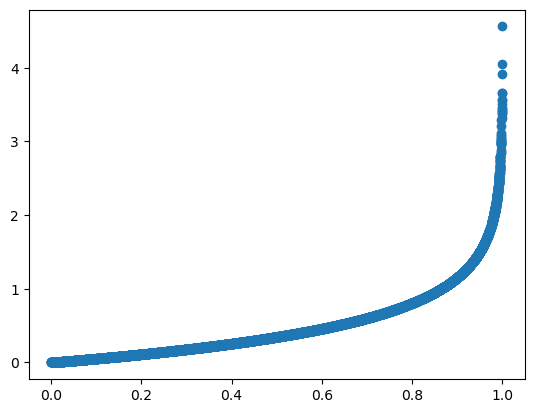

In [6]:
random.seed(0)
Lam = 2
res = np.array([(generateur_invG(F_1)) for k in range (10000)])

plt.scatter(res[:,0],res[:,1])

(array([1.94694979, 1.690426  , 1.6114956 , 1.39005199, 1.38347446,
        1.24973129, 1.07652291, 0.96470485, 0.93181719, 0.80465155,
        0.79149648, 0.72352864, 0.65117577, 0.55251278, 0.48673745,
        0.46042732, 0.39903701, 0.3771119 , 0.40342203, 0.30695154,
        0.30256652, 0.32449163, 0.27625639, 0.21705859, 0.2192511 ,
        0.22802115, 0.20609604, 0.1995185 , 0.16663084, 0.11181806,
        0.14032071, 0.11181806, 0.10743304, 0.11401057, 0.08112291,
        0.08550793, 0.05481278, 0.07673789, 0.06796784, 0.0394652 ,
        0.03727269, 0.05042775, 0.04604273, 0.04385022, 0.04385022,
        0.0394652 , 0.03069515, 0.0197326 , 0.02631013, 0.02850264,
        0.01315507, 0.0197326 , 0.00877004, 0.0197326 , 0.0197326 ,
        0.01315507, 0.00877004, 0.01315507, 0.01096256, 0.00657753,
        0.00877004, 0.00877004, 0.00438502, 0.00219251, 0.00438502,
        0.00877004, 0.01096256, 0.00438502, 0.00219251, 0.        ,
        0.00219251, 0.        , 0.00438502, 0.00

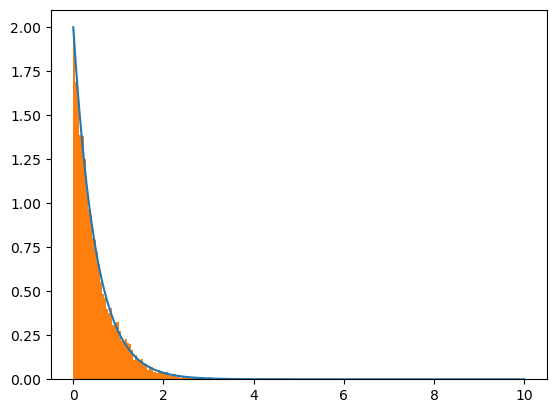

In [7]:
x = np.linspace(0,10,1000)
plt.plot(x,f(x))
plt.hist(res[:,1], bins=100,density=True)

La principale limitation de cette méthode est la calcul de $F^{-1}$, dans notre cas elle était facile à déterminer mais on peut imaginer que ce n'est pas toujours le cas.

## Exercice 2 : Méthode Accept - Reject

In [8]:
f = lambda x : (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

In [9]:
g = lambda x : 1/(np.pi*(1+x**2)) 

In [10]:
def generateur_acc_rej(g) :
    u = random.random()
    x = g(u)
    while (f(x)/(M*g(x))) < u :
        u = random.random()
        x = g(u)
    return u,x

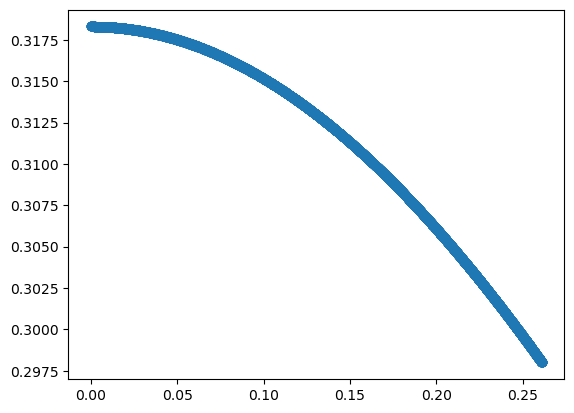

In [11]:
M = 5
res = np.array([(generateur_acc_rej(g)) for k in range (10000)])
plt.scatter(res[:,0],res[:,1])

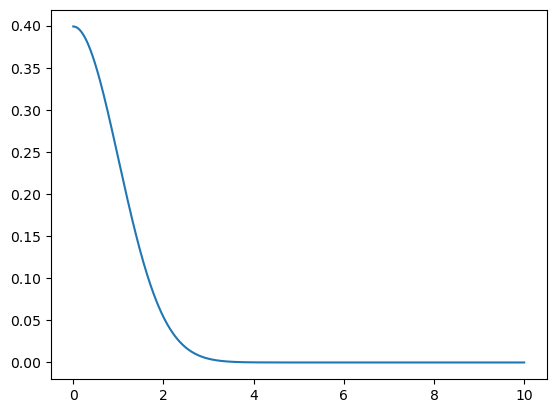

In [12]:
x = np.linspace(0,10,1000)
plt.plot(x,f(x))

(array([ 33.48030336,  24.12551272,  24.12551272,  25.60258492,
         29.54144414,  36.92680518,  23.14079791,  22.64844051,
         25.11022752,  21.1713683 ,  31.51087375,  27.07965713,
         23.63315532,  29.54144414,  26.09494233,  31.51087375,
         33.48030336,  27.57201453,  33.97266077,  27.57201453,
         25.11022752,  31.01851635,  28.55672934,  32.49558856,
         26.09494233,  33.97266077,  22.15608311,  28.55672934,
         28.06437194,  32.98794596,  32.98794596,  26.58729973,
         29.54144414,  32.98794596,  38.40387739,  37.41916258,
         29.54144414,  30.03380155,  34.95737557,  33.97266077,
         23.63315532,  33.97266077,  29.04908674,  30.52615895,
         30.52615895,  37.41916258,  37.91151998,  34.95737557,
         32.00323116,  34.46501817,  27.07965713,  32.98794596,
         38.40387739,  33.97266077,  41.3580218 ,  36.43444778,
         38.40387739,  35.94209038,  34.95737557,  38.89623479,
         48.25102544,  37.41916258,  42.

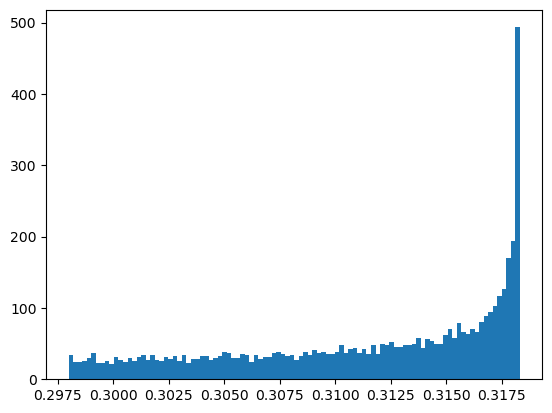

In [13]:
plt.hist(res[:,1], bins=100, density=True)

La principale difficulté de cette méthode est de connaître la valeur de M.

### Exercice 3 : Méthode de Box-Muller pour des lois normales univariées

In [14]:
def box_muller() :
    u1 = np.random.uniform()
    u2 = np.random.uniform()
    R = -2*np.log(u1)
    V = 2*np.pi*u2
    z1 = np.sqrt(R)*np.cos(V)
    z2 = np.sqrt(R)*np.sin(V)
    return np.array([z1,z2])

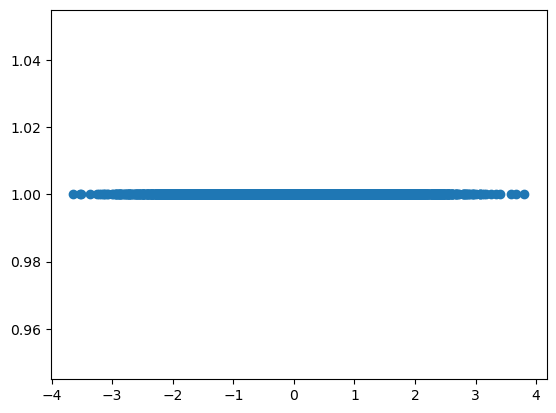

In [15]:
Z = np.array([box_muller() for k in range (5000)])
X = np.concatenate((Z[:,0],Z[:,1]))
plt.scatter(X,np.ones(len(X)))

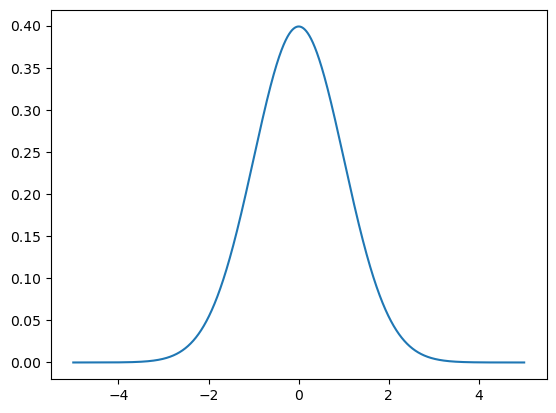

In [16]:
X_gen = np.linspace(-5,5,10000)
plt.plot(X_gen,f(X_gen))

(array([0.00134323, 0.00268647, 0.        , 0.00134323, 0.        ,
        0.00268647, 0.0040297 , 0.0040297 , 0.00268647, 0.0080594 ,
        0.01074586, 0.00940263, 0.01074586, 0.00940263, 0.01611879,
        0.01343233, 0.01611879, 0.02149172, 0.03492405, 0.04029698,
        0.04298345, 0.04164021, 0.05775901, 0.07253457, 0.05641577,
        0.08596689, 0.10477215, 0.09939922, 0.1316368 , 0.14506913,
        0.17059055, 0.14909883, 0.19745521, 0.19342551, 0.2055146 ,
        0.21626047, 0.27804917, 0.29954089, 0.31028675, 0.31297322,
        0.32640555, 0.38819425, 0.33983787, 0.37744839, 0.38416455,
        0.3572999 , 0.39491041, 0.40565628, 0.39356718, 0.4231183 ,
        0.38416455, 0.40565628, 0.42580477, 0.3653593 , 0.33983787,
        0.3572999 , 0.33849464, 0.29819766, 0.31028675, 0.29819766,
        0.26327361, 0.25790068, 0.2216334 , 0.23103602, 0.21223077,
        0.17730672, 0.18805258, 0.17193379, 0.1437259 , 0.11014508,
        0.11820448, 0.08328043, 0.07656426, 0.07

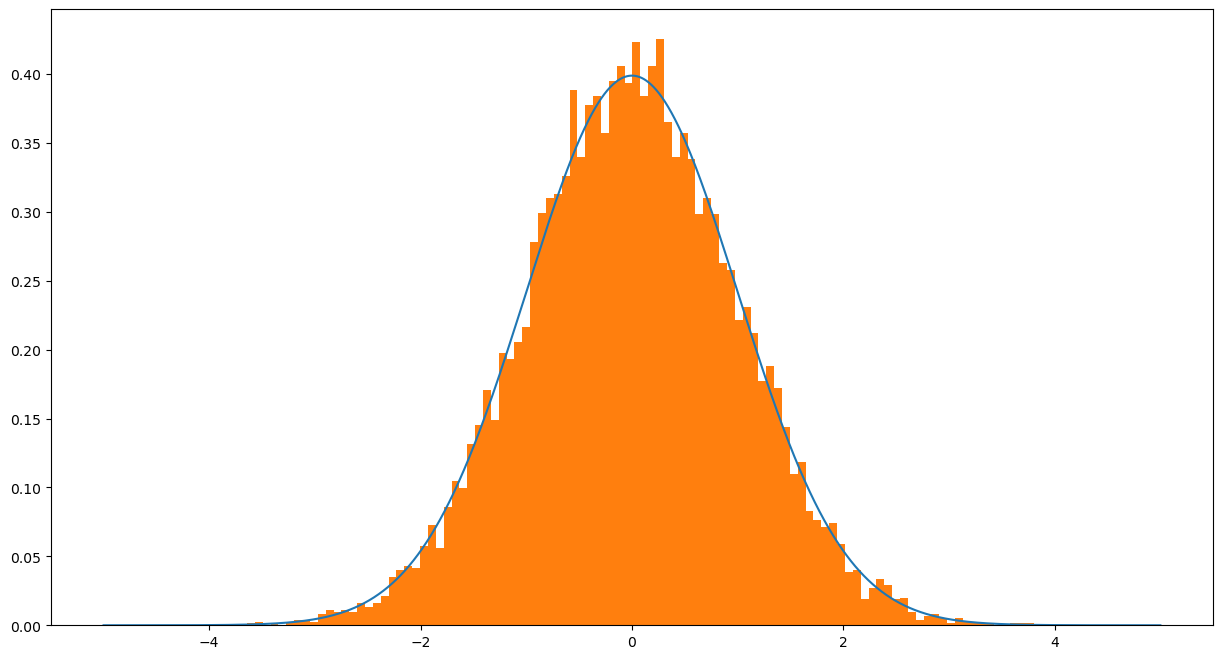

In [17]:
plt.figure(figsize=(15,8))
plt.plot(X_gen,f(X_gen))
plt.hist(ee, bins=100, density=True)

On remarque que les données générées par le méthode de Box-Muller collent plutôt bien avec la gaussienne. 

<Figure size 1500x800 with 0 Axes>

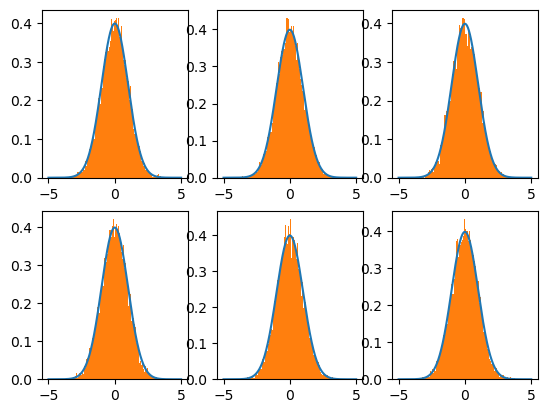

In [18]:
plt.figure(figsize=(15,8))
figure, axis = plt.subplots(2, 3)

X1 = np.array([box_muller()[0] for k in range (10000)])
X2 = np.array([box_muller()[0] for k in range (10000)])
X3 = np.array([box_muller()[0] for k in range (10000)])
X4 = np.array([box_muller()[0] for k in range (10000)])
X5 = np.array([box_muller()[0] for k in range (10000)])
X6 = np.array([box_muller()[0] for k in range (10000)])

axis[0,0].plot(X_gen,f(X_gen))
axis[0,0].hist(X1, bins=100, density=True, histtype ='bar')

axis[0,1].plot(X_gen,f(X_gen))
axis[0,1].hist(X2, bins=100, density=True, histtype ='bar')

axis[1,0].plot(X_gen,f(X_gen))
axis[1,0].hist(X3, bins=100, density=True, histtype ='bar')

axis[1,1].plot(X_gen,f(X_gen))
axis[1,1].hist(X4, bins=100, density=True, histtype ='bar')

axis[1,2].plot(X_gen,f(X_gen))
axis[1,2].hist(X5, bins=100, density=True, histtype ='bar')

axis[0,2].plot(X_gen,f(X_gen))
axis[0,2].hist(X6, bins=100, density=True, histtype ='bar')

plt.show()

On a l'impression qu'en lançant plusieurs simulations,les valeurs extrèmes de la loi normale sont toujours assez bien estimées mais que la méthode à plus de mal au niveau du maximum de la densité de probabilité

In [19]:
X_mu_sig = X[0:10000]
X_mu_sig = 3*X_mu_sig -3

(array([0.00044774, 0.00089549, 0.        , 0.00044774, 0.        ,
        0.00089549, 0.00134323, 0.00134323, 0.00089549, 0.00268647,
        0.00358195, 0.00313421, 0.00358195, 0.00313421, 0.00537293,
        0.00447744, 0.00537293, 0.00716391, 0.01164135, 0.01343233,
        0.01432782, 0.01388007, 0.019253  , 0.02417819, 0.01880526,
        0.02865563, 0.03492405, 0.03313307, 0.04387893, 0.04835638,
        0.05686352, 0.04969961, 0.0658184 , 0.06447517, 0.06850487,
        0.07208682, 0.09268306, 0.09984696, 0.10342892, 0.10432441,
        0.10880185, 0.12939808, 0.11327929, 0.12581613, 0.12805485,
        0.11909997, 0.1316368 , 0.13521876, 0.13118906, 0.14103943,
        0.12805485, 0.13521876, 0.14193492, 0.12178643, 0.11327929,
        0.11909997, 0.11283155, 0.09939922, 0.10342892, 0.09939922,
        0.08775787, 0.08596689, 0.0738778 , 0.07701201, 0.07074359,
        0.05910224, 0.06268419, 0.05731126, 0.04790863, 0.03671503,
        0.03940149, 0.02776014, 0.02552142, 0.02

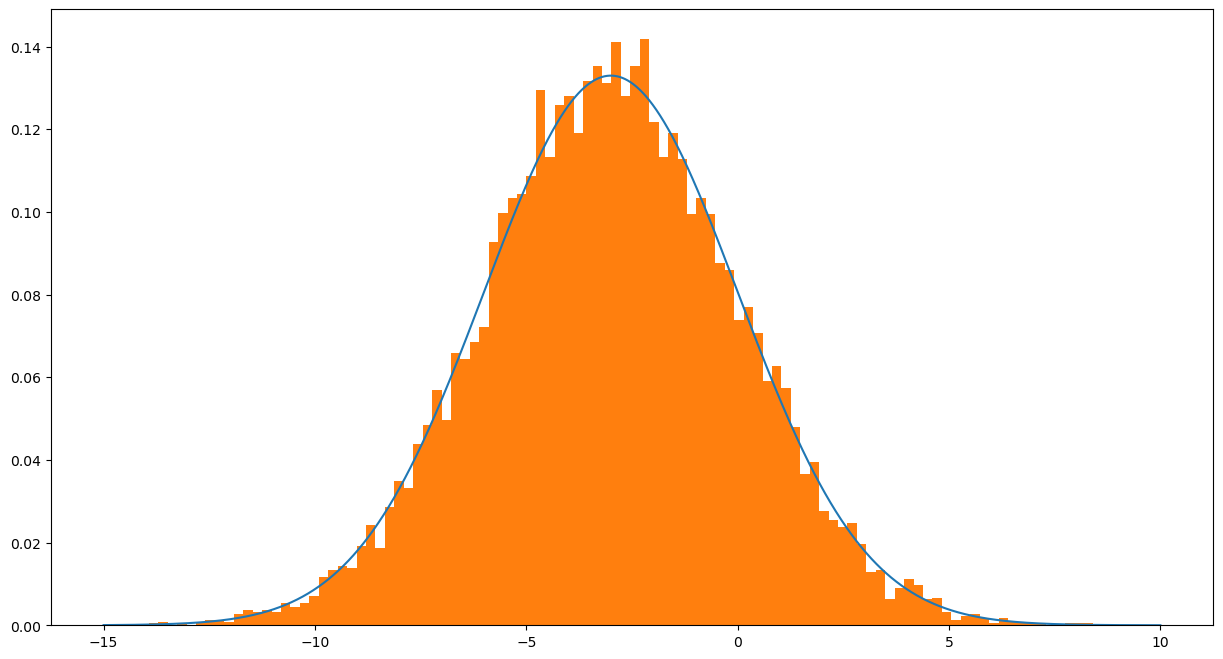

In [20]:
X_gen = np.linspace(-15,10,10000)
plt.figure(figsize=(15,8))
plt.plot(X_gen,scipy.stats.norm.pdf(X_gen,-3,3))
plt.hist(X_mu_sig, bins=100, density=True)

On voit que la méthode fonctionne toujours. Ceci-dit, la précision semble plus faible que pour la loi normale centrée réduite.

Les principaux intérêts de la méthode de Box-Muller sont sa simplicité et sa rapidité, tout en conservant une bonne précision.

### Exercice 4 : Générer des échantillons d'une loi normale multivariée

In [21]:
def gen_normal_multi(n, mu, S) :
    Z12 = np.array([box_muller() for k in range (n)])
    Z34 = np.array([box_muller() for k in range (n)])
    Z56 = np.array([box_muller() for k in range (n)])
    Z = np.concatenate((Z12,Z34,Z56),axis=1)
    print(Z.shape)
    A = np.linalg.cholesky(S)
    print(A.shape)
    mu = np.reshape(mu,(6,1))
    X = mu + A@Z.T
    return X.T

In [22]:
mu = np.array([0, 50, 100, -50, -100, 200]).T
S = np.array(([11, 10, 5, 9, 4, 2],
             [10, 13, 9, 15, 5, 3],
             [5, 9, 15, 11, 3, 1],
             [9, 15, 11, 21, 6, 4],
             [4, 5, 3, 6, 5, 1],
             [2, 3, 1, 4, 1, 1]))

In [23]:
res = gen_normal_multi(1000, mu, S)

(1000, 6)
(6, 6)


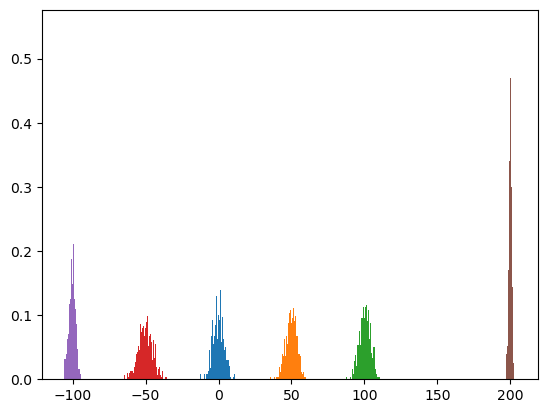

In [24]:
X_gen = np.linspace(-15,10,1000)
for k in range (6):
    plt.hist(res[:,k], bins=100,density=True, histtype ='bar')

On obtient bien 5 courbes correspondant à des lois normales de moyenne et de variance précisées en entrée de l'algorithme.

### Exercice 5 : échantillonner suivant une loi de Bernoulli

In [25]:
def gen_bernoulli(p) :
    u = np.random.uniform()
    if u<p :
        X = 0
    else :
        X = 1
    return X

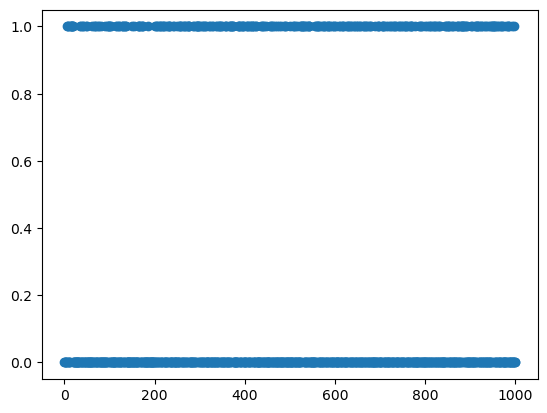

In [26]:
echantillons = [gen_bernoulli(0.7) for i in range (1000)]
x = np.linspace(0,1000,1000) 
plt.scatter(x,echantillons)

In [27]:
echantillons.count(0)

686

On obtient bien une fréquence empirique proche de la fréquence théorique de 0,7.

### Exercice 6 : Les méthodes Monte Carlo Markov Chain

#### L'algorithme de Metropolis-Hastings (version indépendante)

In [60]:
def MH(N_echant,N_chauffe,loi_proposition,loi_candidate,f):
    X = np.zeros(shape = N_echant)
    x = loi_candidate()
    y = loi_proposition()
    s = 0
    for k in range (N_chauffe): # on commence par le temps de chauffe
        p = min((f(y)/f(x)),1)
        u = np.random.uniform(0,1)
        if u<p:
            x=y
        y = loi_proposition()
        
    for k in range (N_echant):
        p = min((f(y)/f(x)),1)
        u = np.random.uniform(0,1)
        if u<p:
            x=y
        X[k]= x
        y = loi_proposition()
        
    return(X)
        
        

In [61]:
N_echant = 20000
N_chauffe = 500
def loi_proposition():
    return(np.random.uniform(-1,1))
f = lambda x: scipy.stats.norm.pdf(x, loc = 0, scale = 1)
X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)

(array([0.37251387, 0.34751294, 0.35501321, 0.42001563, 0.36751368,
        0.37501396, 0.43001601, 0.37751405, 0.41501545, 0.40751517,
        0.42751591, 0.42751591, 0.40251498, 0.5025187 , 0.44751666,
        0.38251424, 0.48751815, 0.45251684, 0.52251945, 0.47501768,
        0.50001861, 0.49251833, 0.48501805, 0.52751964, 0.56752112,
        0.51001898, 0.53501991, 0.52501954, 0.54752038, 0.55752075,
        0.51501917, 0.5400201 , 0.49751852, 0.64002382, 0.52251945,
        0.60752261, 0.56252094, 0.62752336, 0.58752187, 0.56252094,
        0.63502364, 0.52001936, 0.5775215 , 0.5025187 , 0.5775215 ,
        0.5775215 , 0.62252317, 0.6125228 , 0.59002196, 0.58252168,
        0.57002122, 0.64252392, 0.61752299, 0.54502029, 0.58752187,
        0.52001936, 0.5050188 , 0.56002084, 0.52751964, 0.55252057,
        0.52001936, 0.55752075, 0.52001936, 0.54252019, 0.65502438,
        0.5025187 , 0.57252131, 0.59752224, 0.51251908, 0.51501917,
        0.55002047, 0.54502029, 0.51251908, 0.50

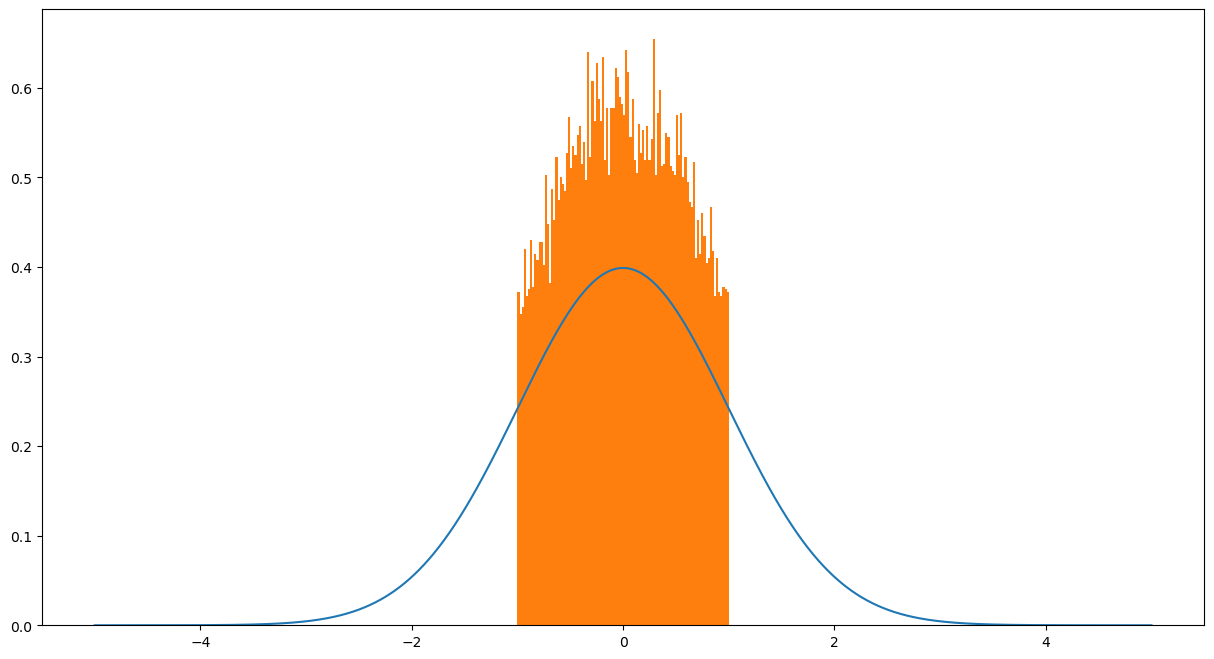

In [62]:
X_gen = np.linspace(-5,5,10000)
plt.figure(figsize=(15,8))
plt.plot(X_gen,scipy.stats.norm.pdf(X_gen,0,1))
plt.hist(X, bins=100, density=True)

L'approximation n'est pas vraiment satisfaisante... Ceci s'explique simplement par le fait que notre modélisation n'est pas bonne : en utilisant une loi uniforme entre -1 et 1 on force les valeurs dans cet intervale ce qui rend l'estimation des "côtés" de la gaussienne impossible. En plus, on modélise une densité de probabilité donc d'aire 1. Le fait que les bords de la gaussienne soient nuls amplifie donc les valeurs du sommet ce qui rend son estimation mauvaise... 

La solution : prendre un intervalle plus grand pour notre loi uniforme

In [63]:
N_echant = 20000
N_chauffe =1000
def loi_proposition():
    return(np.random.uniform(-20,20))
X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)

(array([3.74754870e-04, 4.49705844e-03, 0.00000000e+00, 0.00000000e+00,
        1.61144594e-02, 1.34911753e-02, 4.08482808e-02, 1.12426461e-02,
        3.26036737e-02, 3.67259773e-02, 4.08482808e-02, 9.29392077e-02,
        8.09470519e-02, 1.13175971e-01, 8.28208263e-02, 1.77259053e-01,
        2.19606354e-01, 1.91124984e-01, 2.48837234e-01, 3.20040659e-01,
        2.39093607e-01, 2.56332331e-01, 3.54143352e-01, 2.83689437e-01,
        3.96490652e-01, 3.02427180e-01, 3.60139430e-01, 3.88246045e-01,
        4.21224474e-01, 4.50455354e-01, 2.96805857e-01, 3.08423258e-01,
        3.17417375e-01, 2.83689437e-01, 2.01992875e-01, 2.46963459e-01,
        1.09428422e-01, 1.18047784e-01, 1.22170088e-01, 6.85801412e-02,
        6.22093084e-02, 3.59764675e-02, 4.34715649e-02, 1.34911753e-02,
        4.27220552e-02, 1.27416656e-02, 1.57397045e-02, 1.61144594e-02,
        3.74754870e-04, 2.99803896e-03]),
 array([-3.50319412, -3.36977358, -3.23635303, -3.10293248, -2.96951193,
        -2.83609138, 

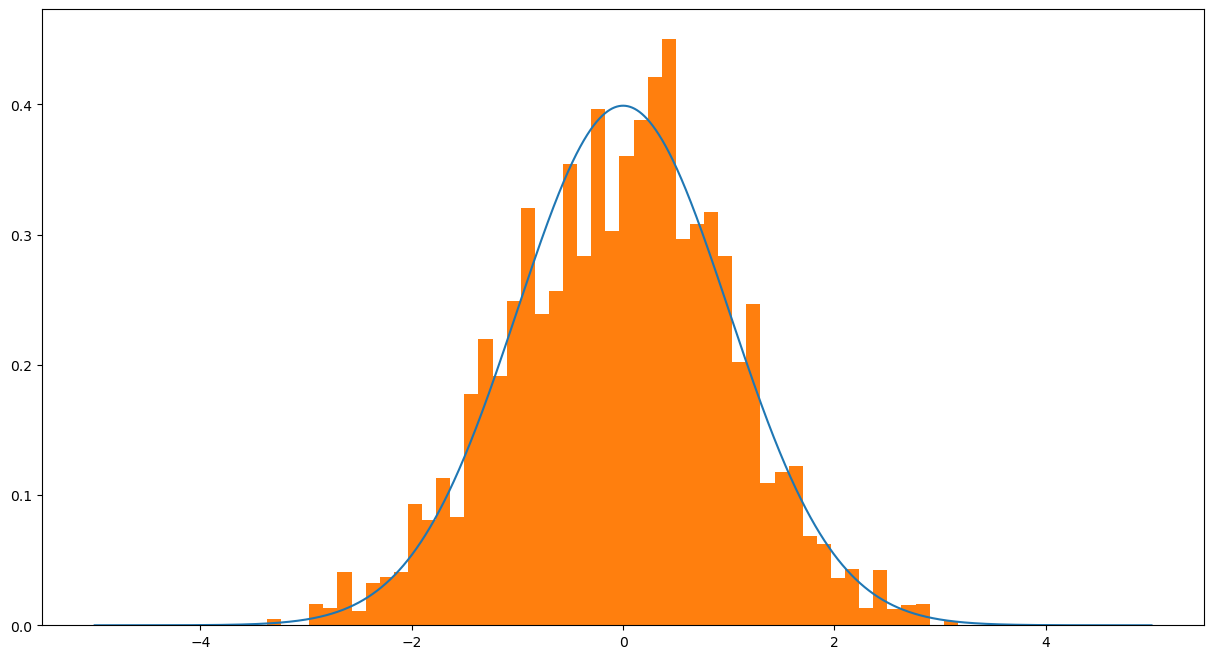

In [64]:
X_gen = np.linspace(-5,5,10000)
plt.figure(figsize=(15,8))
plt.plot(X_gen,scipy.stats.norm.pdf(X_gen,0,1))
plt.hist(X, bins=50, density=True)

On obtient un meilleur résultat mais tout de même moins bon que les méthodes précédentes.

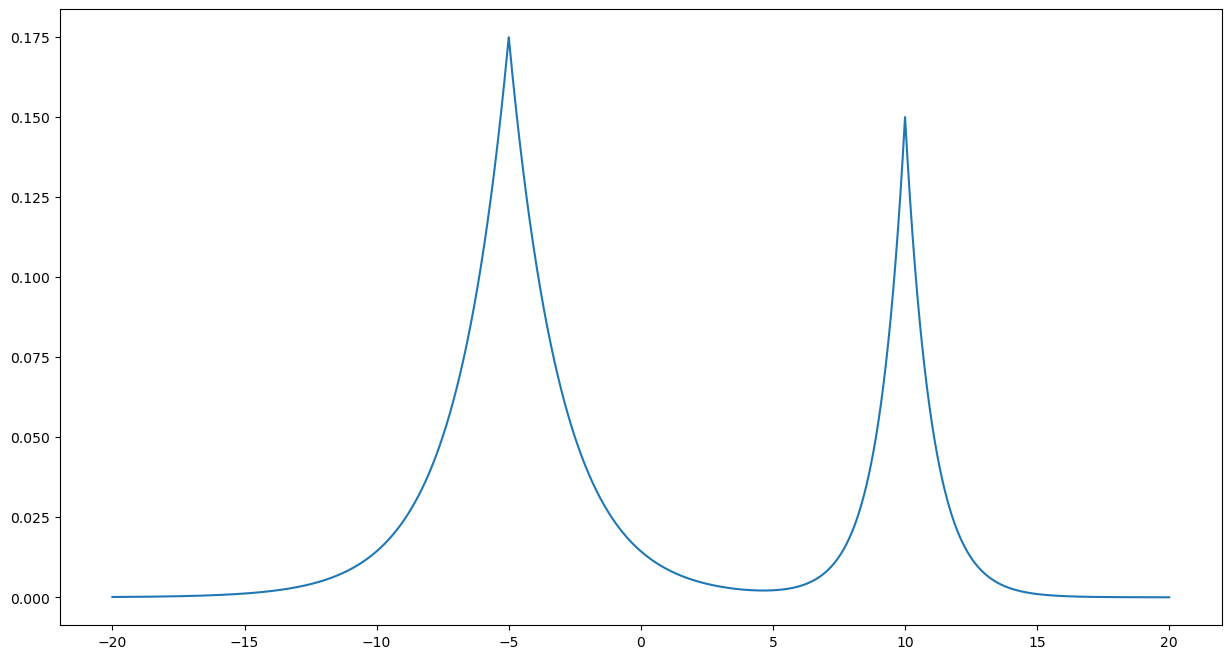

In [65]:
a1 = 1
a2 = 2
mu1 = 10
mu2 = -5
p = 0.3

laplace = lambda x,a,mu: 1/(2*a) * np.exp(-np.abs((x-mu)/a))

def f(x):
    return p*laplace(x,a1,mu1) + (1-p)*laplace(x,a2,mu2)

X_gen = np.linspace(-20,20,10000)
plt.figure(figsize=(15,8))
plt.plot(X_gen,f(X_gen))

In [69]:
N_echant = 20000
N_chauffe =1000

def loi_proposition():
    return(np.random.uniform(-20,20))

def loi_candidate():
    return(scipy.stats.norm.rvs( loc = -20, scale = 40))

X = MH(N_echant,N_chauffe,loi_proposition,loi_candidate,f)

(array([1.32963578e-04, 0.00000000e+00, 3.98890733e-04, 2.65927155e-04,
        5.31854310e-04, 3.98890733e-04, 5.31854310e-04, 6.64817888e-04,
        1.32963578e-03, 6.64817888e-04, 7.97781465e-04, 1.46259935e-03,
        1.19667220e-03, 1.19667220e-03, 1.99445366e-03, 1.46259935e-03,
        2.52630797e-03, 1.32963578e-03, 3.05816228e-03, 5.58447026e-03,
        4.91965237e-03, 7.31299676e-03, 7.84485107e-03, 9.83930474e-03,
        1.01052319e-02, 1.58226657e-02, 1.56897021e-02, 2.69916062e-02,
        3.03156957e-02, 3.17782950e-02, 4.82657786e-02, 4.32131627e-02,
        6.19610271e-02, 7.36618220e-02, 7.65870207e-02, 9.93237924e-02,
        1.12088296e-01, 1.19268329e-01, 1.77639340e-01, 1.59955184e-01,
        1.29639488e-01, 9.66645209e-02, 7.48584942e-02, 7.55233120e-02,
        6.22269543e-02, 5.15898681e-02, 2.92519871e-02, 3.36397851e-02,
        3.25760765e-02, 2.39334440e-02, 1.99445366e-02, 1.64874836e-02,
        1.32963578e-02, 7.84485107e-03, 9.44041401e-03, 6.382251

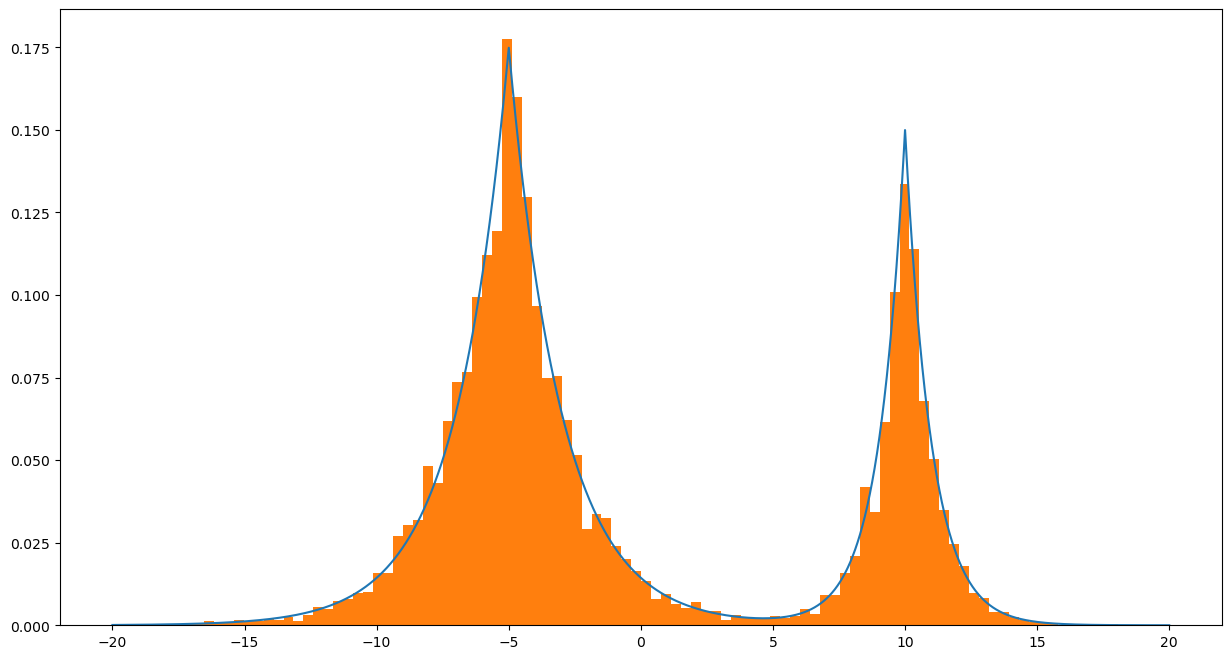

In [70]:
X_gen = np.linspace(-20,20,10000)
plt.figure(figsize=(15,8))
plt.plot(X_gen,f(X_gen))
plt.hist(X, bins=100, density=True)

# Exercice 7 : Echantillonnage de Monte Carlo parfait

In [72]:
N_echant = 100
N_chauffe =100

def loi_proposition():
    return(np.random.uniform(-20,20))

f = lambda x: scipy.stats.norm.pdf(x, loc = 5, scale = 2)

X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)
print("moyenne en suivant la méthode d'échantillonnage de Monte Carlo parfait : ", np.sum(X)/len(X))


moyenne en suivant la méthode d'échantillonnage de Monte Carlo parfait :  5.267686355307598


L'estimation est assez correcte. Or il faut plus d'échantillons pour pouvoir faire des statistiques.

On va faire avec seulement 1000 répétitions car cela prend un temps fou....

In [83]:
N_echant = 100
N_chauffe =100

nrep = 1000
res = np.zeros(nrep)
for k in range(nrep):
    X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)
    res[k] = np.sum(X)/len(X)
    if(k%100 == 0):
        print("avancée : ", k/nrep*100, " %")
    


avancée :  0.0  %
avancée :  10.0  %
avancée :  20.0  %
avancée :  30.0  %
avancée :  40.0  %
avancée :  50.0  %
avancée :  60.0  %
avancée :  70.0  %
avancée :  80.0  %
avancée :  90.0  %


(array([0.01095102, 0.00547551, 0.02190203, 0.07665712, 0.18069178,
        0.26829992, 0.30662848, 0.54755086, 0.65706103, 0.67896307,
        0.75014468, 0.56945289, 0.47089374, 0.35043255, 0.2573489 ,
        0.12046119, 0.05475509, 0.08760814, 0.03285305, 0.02737754]),
 array([3.1986276 , 3.38125904, 3.56389048, 3.74652191, 3.92915335,
        4.11178478, 4.29441622, 4.47704766, 4.65967909, 4.84231053,
        5.02494197, 5.2075734 , 5.39020484, 5.57283628, 5.75546771,
        5.93809915, 6.12073059, 6.30336202, 6.48599346, 6.66862489,
        6.85125633]),
 <BarContainer object of 20 artists>)

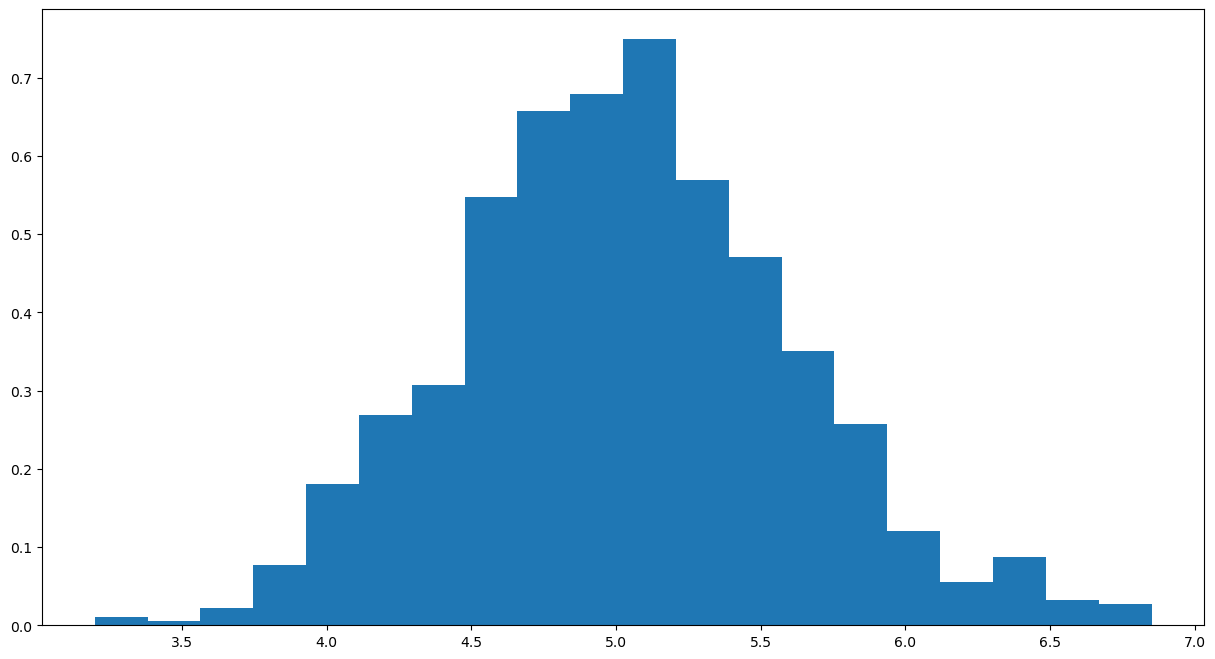

In [84]:
plt.figure(figsize=(15,8))
plt.hist(res, bins=20, density=True)

In [85]:
N_echant = 1000
N_chauffe =100

nrep = 1000
res = np.zeros(nrep)
for k in range(nrep):
    X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)
    res[k] = np.sum(X)/len(X)
    if(k%100 == 0):
        print("avancée : ", k/nrep*100, " %")

avancée :  0.0  %
avancée :  10.0  %
avancée :  20.0  %
avancée :  30.0  %
avancée :  40.0  %
avancée :  50.0  %
avancée :  60.0  %
avancée :  70.0  %
avancée :  80.0  %
avancée :  90.0  %


(array([0.01510458, 0.        , 0.03020917, 0.15104583, 0.181255  ,
        0.39271916, 0.69481082, 1.17815748, 1.58598122, 1.85786372,
        1.72192247, 2.11464163, 1.54066748, 1.37451706, 0.95158873,
        0.67970624, 0.33230083, 0.19635958, 0.06041833, 0.04531375]),
 array([4.28384621, 4.35005128, 4.41625635, 4.48246142, 4.54866649,
        4.61487156, 4.68107663, 4.74728171, 4.81348678, 4.87969185,
        4.94589692, 5.01210199, 5.07830706, 5.14451213, 5.2107172 ,
        5.27692228, 5.34312735, 5.40933242, 5.47553749, 5.54174256,
        5.60794763]),
 <BarContainer object of 20 artists>)

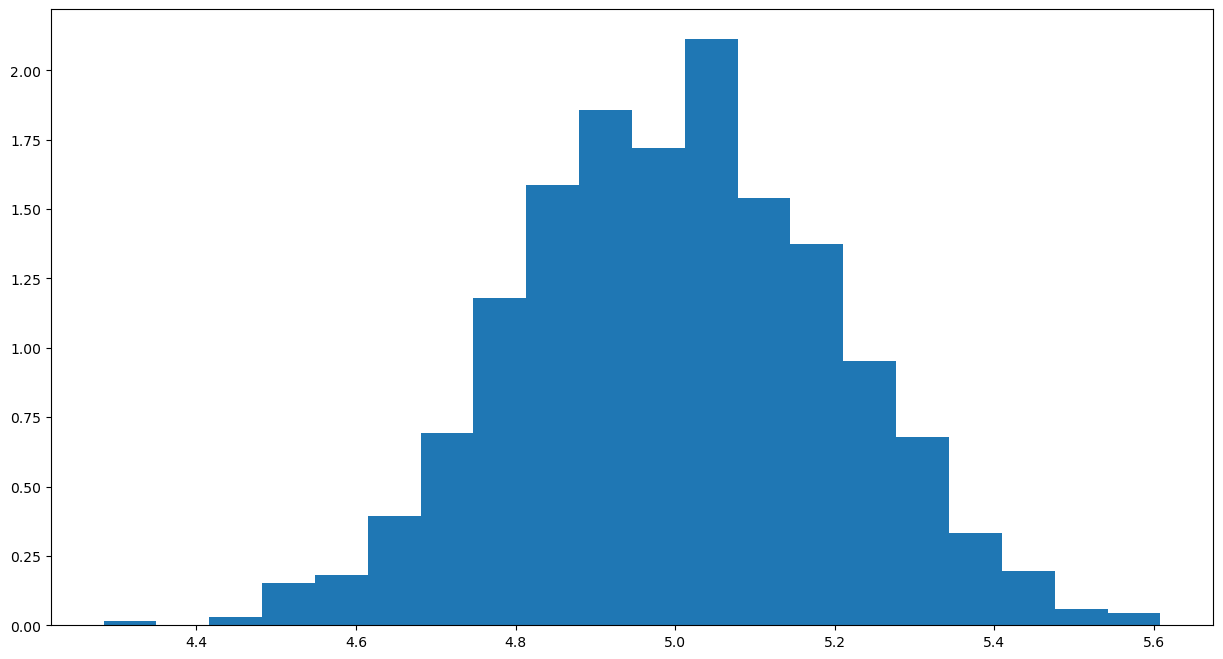

In [86]:
plt.figure(figsize=(15,8))
plt.hist(res, bins=20, density=True)

In [87]:
N_echant = 10000
N_chauffe =100

nrep = 1000
res = np.zeros(nrep)
for k in range(nrep):
    X = MH(N_echant,N_chauffe,loi_proposition,loi_proposition,f)
    res[k] = np.sum(X)/len(X)
    if(k%100 == 0):
        print("avancée : ", k/nrep*100, " %")

avancée :  0.0  %
avancée :  10.0  %
avancée :  20.0  %
avancée :  30.0  %
avancée :  40.0  %
avancée :  50.0  %
avancée :  60.0  %
avancée :  70.0  %
avancée :  80.0  %
avancée :  90.0  %


(array([0.10584169, 0.10584169, 0.47628762, 0.63505016, 1.32302117,
        2.2755964 , 3.0694091 , 5.02748043, 6.2446599 , 5.92713482,
        7.0384726 , 6.56218498, 4.49827196, 3.59861757, 2.80480487,
        1.37594201, 0.89965439, 0.63505016, 0.26460423, 0.05292085]),
 array([4.81150115, 4.83039729, 4.84929344, 4.86818958, 4.88708573,
        4.90598187, 4.92487802, 4.94377416, 4.96267031, 4.98156645,
        5.0004626 , 5.01935874, 5.03825489, 5.05715103, 5.07604718,
        5.09494332, 5.11383947, 5.13273561, 5.15163176, 5.1705279 ,
        5.18942405]),
 <BarContainer object of 20 artists>)

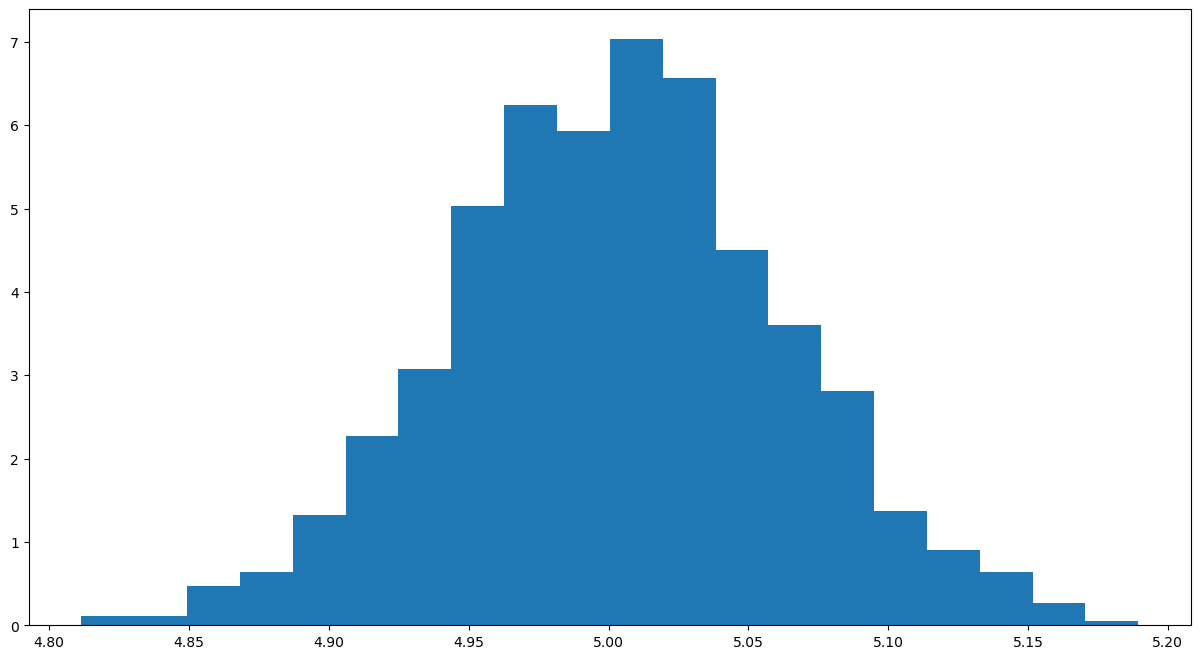

In [88]:
plt.figure(figsize=(15,8))
plt.hist(res, bins=20, density=True)

On remarque que la moyenne de nos estimations reste centrée en 5 ce qui est  bon signe... plus on a d'échantillons et plus la variance est faible autour de 5.